In [19]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU

In [7]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [8]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


In [9]:
# Передпроцесинг послідовних даних:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [10]:
# Побудова простої моделі RNN:
model = Sequential()

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами. Параметр: кількість вузлів (розмір прихованого стану)
model.add(SimpleRNN(32))

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 252ms/step - acc: 0.5409 - loss: 0.6970 - val_acc: 0.6152 - val_loss: 0.6486
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 293ms/step - acc: 0.7635 - loss: 0.5241 - val_acc: 0.8071 - val_loss: 0.4384
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 273ms/step - acc: 0.8549 - loss: 0.3623 - val_acc: 0.7965 - val_loss: 0.5195
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 33s 243ms/step - acc: 0.8783 - loss: 0.2997 - val_acc: 0.8447 - val_loss: 0.3802
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 31s 227ms/step - acc: 0.9150 - loss: 0.2210 - val_acc: 0.7779 - val_loss: 0.5038


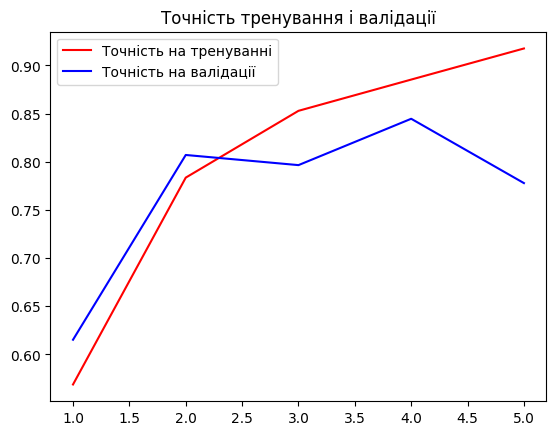

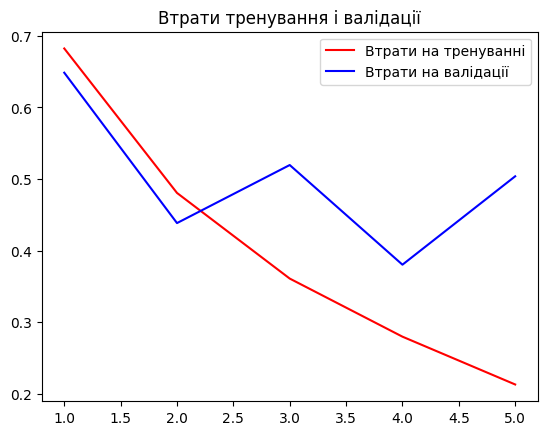

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  
plt.legend() 
plt.figure()

plt.plot(epochs, loss, 'r', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  
plt.legend()
plt.show()  

In [42]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі, Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - acc: 0.7751 - loss: 0.5104
Test Loss: 0.5054072737693787
Test Accuracy: 0.7752000093460083


In [20]:
model_gru = Sequential()

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини.
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_gru.add(Embedding(max_features, 32)) 

# Додавання GRU шару з 32 вузлами. Параметр: кількість вузлів (розмір прихованого стану)
model_gru.add(GRU(32)) 

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_gru.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [21]:
model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [22]:
model_gru.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
history_gru = model_gru.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 67s 467ms/step - acc: 0.5507 - loss: 0.6846 - val_acc: 0.7661 - val_loss: 0.4880
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 90s 655ms/step - acc: 0.7732 - loss: 0.4751 - val_acc: 0.8219 - val_loss: 0.4025
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 97s 708ms/step - acc: 0.8522 - loss: 0.3572 - val_acc: 0.8535 - val_loss: 0.3417
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 100s 728ms/step - acc: 0.8748 - loss: 0.3114 - val_acc: 0.8595 - val_loss: 0.3417
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 92s 674ms/step - acc: 0.8781 - loss: 0.2977 - val_acc: 0.8513 - val_loss: 0.3643


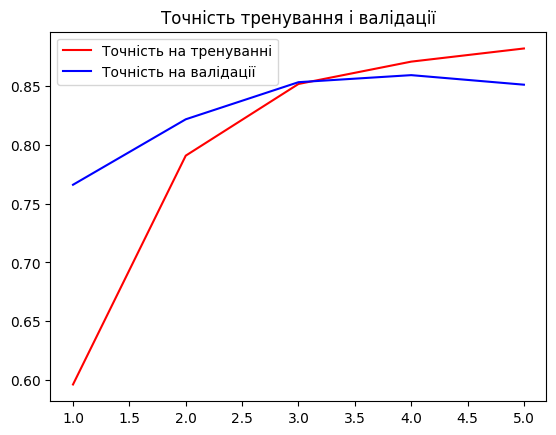

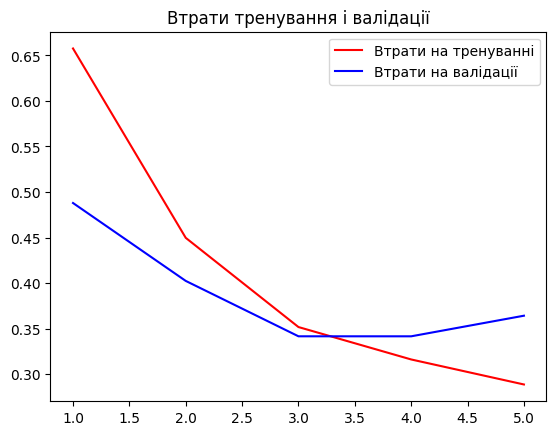

In [25]:
acc = history_gru.history['acc']
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  
plt.legend()  
plt.figure()

plt.plot(epochs, loss, 'r', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  
plt.show()

In [26]:
# Прогнозування з використанням навченої моделі:
predictions_gru = model_gru.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_gru = [1 if pred > 0.5 else 0 for pred in predictions_gru]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі. Це дасть загальну точність моделі на тестових даних
test_loss_gru, test_acc_gru = model_gru.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_gru))
print('Test Accuracy: {}'.format(test_acc_gru))

782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - acc: 0.8515 - loss: 0.3668
Test Loss: 0.3668905198574066
Test Accuracy: 0.8517199754714966


In [27]:
# Побудова моделі LSTM:
from keras.layers import  LSTM

model_lstm = Sequential()

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_lstm.add(Embedding(max_features, 32))


# Додавання LSTM шару з 32 вузлами. Параметр: кількість вузлів (розмір прихованого стану)
model_lstm.add(LSTM(32))

# Додавання Dense шару з одним вузлом та активацією sigmoid
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
model_lstm.add(Dense(1, activation='sigmoid'))

In [28]:
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [29]:
model_lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини
history_lstm = model_lstm.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 88s 615ms/step - acc: 0.5704 - loss: 0.6747 - val_acc: 0.7221 - val_loss: 0.5490
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 87s 629ms/step - acc: 0.7915 - loss: 0.4666 - val_acc: 0.8545 - val_loss: 0.3487
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 86s 631ms/step - acc: 0.8614 - loss: 0.3417 - val_acc: 0.8375 - val_loss: 0.3881
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 95s 693ms/step - acc: 0.8654 - loss: 0.3278 - val_acc: 0.8719 - val_loss: 0.3140
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 98s 720ms/step - acc: 0.8939 - loss: 0.2730 - val_acc: 0.8675 - val_loss: 0.3176


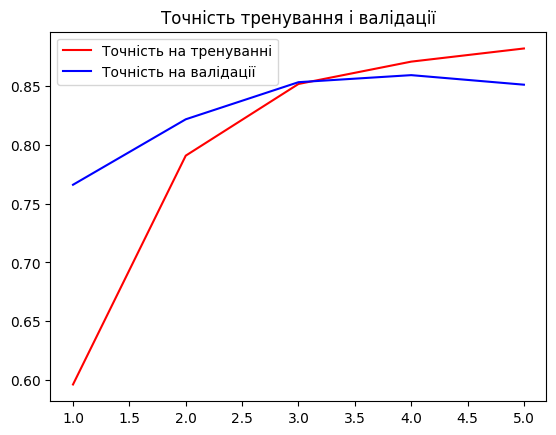

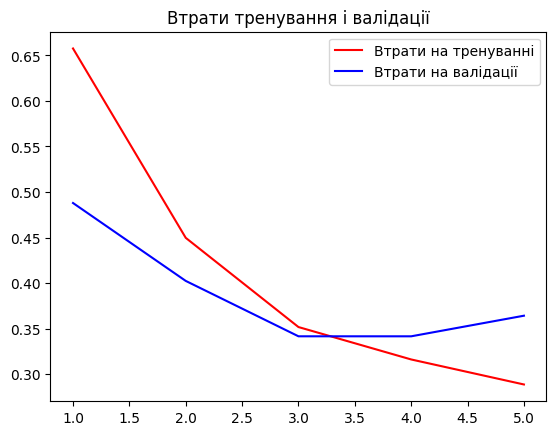

In [38]:
acc_lstm = history_lstm.history['acc']
val_acc_lstm = history_lstm.history['val_acc']
loss_lstm = history_lstm.history['loss']
val_loss_lstm = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()
plt.show()

In [39]:
# Прогнозування з використанням навченої моделі:
predictions_lstm = model_lstm.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_lstm = [1 if pred > 0.5 else 0 for pred in predictions_lstm]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions_lstm[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_lstm))
print('Test Accuracy: {}'.format(test_acc_lstm))

782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - acc: 0.8639 - loss: 0.3270
Test Loss: 0.3221571743488312
Test Accuracy: 0.8659999966621399


In [34]:
# Побудова моделі BRNN з LSTM
from keras.layers import Bidirectional

model_brnn = Sequential()

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_brnn.add(Embedding(max_features, 32))

# Додавання Bidirectional LSTM шару з 32 вузлами. Параметр: кількість вузлів (розмір прихованого стану)
model_brnn.add(Bidirectional(LSTM(32))) 

# Додавання Dense шару з одним вузлом та активацією sigmoid
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
model_brnn.add(Dense(1, activation='sigmoid'))

In [35]:
model_brnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [36]:
model_brnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини
history_brnn = model_brnn.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - acc: 0.5375 - loss: 0.6844 - val_acc: 0.7695 - val_loss: 0.5092
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - acc: 0.7790 - loss: 0.4795 - val_acc: 0.8457 - val_loss: 0.3639
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - acc: 0.8475 - loss: 0.3620 - val_acc: 0.8551 - val_loss: 0.3419
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - acc: 0.8687 - loss: 0.3204 - val_acc: 0.8680 - val_loss: 0.3164
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - acc: 0.8865 - loss: 0.2814 - val_acc: 0.8423 - val_loss: 0.3639


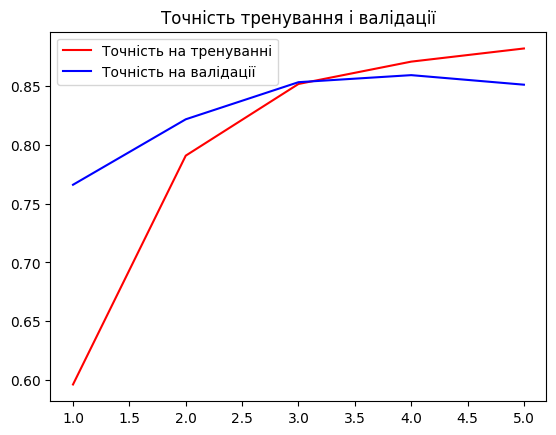

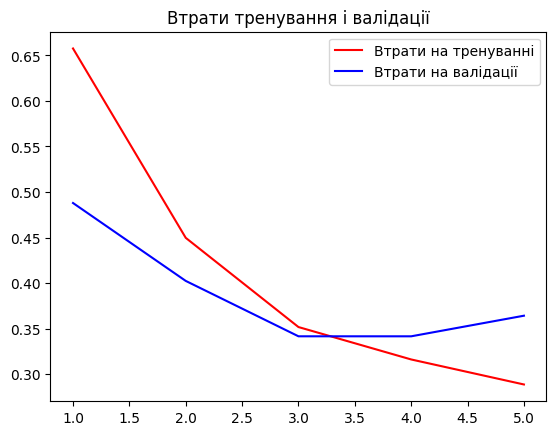

In [41]:
acc_brnn = history_brnn.history['acc']
val_acc_brnn = history_brnn.history['val_acc']
loss_brnn = history_brnn.history['loss']
val_loss_brnn = history_brnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')
plt.legend()
plt.show()

In [44]:
# Прогнозування з використанням навченої моделі:
predictions_brnn = model_brnn.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_brnn = [1 if pred > 0.5 else 0 for pred in predictions_brnn]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions_brnn[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі. Це дасть загальну точність моделі на тестових даних
test_loss_brnn, test_acc_brnn = model_brnn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_brnn))
print('Test Accuracy: {}'.format(test_acc_brnn))

782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - acc: 0.8391 - loss: 0.3632
Test Loss: 0.3607740104198456
Test Accuracy: 0.8422399759292603


In [45]:
# Побудова моделі Deep BRNN з LSTM

model_dbrnn = Sequential()

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_dbrnn.add(Embedding(max_features, 32))

# Додавання декількох Bidirectional LSTM шару з 32 вузлами
# Параметр: кількість вузлів (розмір прихованого стану) і return_sequences=True для першого шару, щоб надати послідовність як вхід на наступний шар

model_dbrnn.add(Bidirectional(LSTM(32, return_sequences=True)))
model_dbrnn.add(Bidirectional(LSTM(32)))

# Додавання Dense шару з одним вузлом та активацією sigmoid
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
model_dbrnn.add(Dense(1, activation='sigmoid'))

In [46]:
model_dbrnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_dbrnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини
history_dbrnn = model_dbrnn.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - acc: 0.5356 - loss: 0.6860 - val_acc: 0.6665 - val_loss: 0.6644
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - acc: 0.7846 - loss: 0.4778 - val_acc: 0.8329 - val_loss: 0.3894
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - acc: 0.8562 - loss: 0.3567 - val_acc: 0.8433 - val_loss: 0.3845
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - acc: 0.8822 - loss: 0.2952 - val_acc: 0.8573 - val_loss: 0.3437
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - acc: 0.9012 - loss: 0.2555 - val_acc: 0.8551 - val_loss: 0.3492


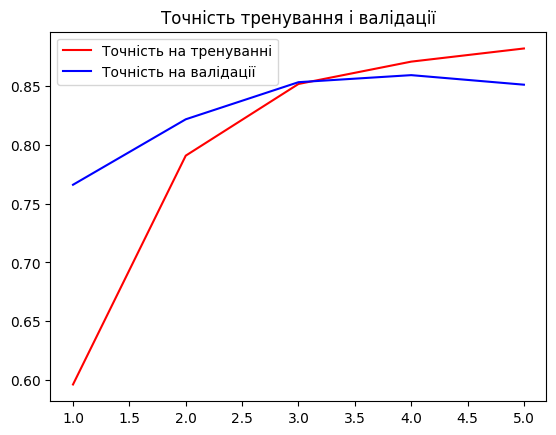

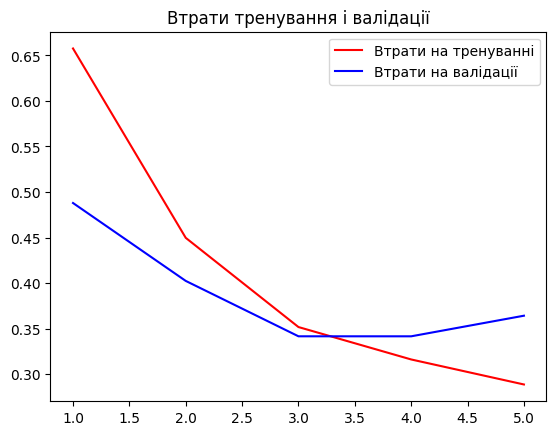

In [48]:
acc_dbrnn = history_dbrnn.history['acc']
val_acc_dbrnn = history_dbrnn.history['val_acc']
loss_dbrnn = history_dbrnn.history['loss']
val_loss_dbrnn = history_dbrnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')
plt.legend()
plt.show()

In [49]:
predictions_dbrnn = model_dbrnn.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_dbrnn = [1 if pred > 0.5 else 0 for pred in predictions_dbrnn]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions_dbrnn[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_dbrnn, test_acc_dbrnn = model_dbrnn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_dbrnn))
print('Test Accuracy: {}'.format(test_acc_dbrnn))

782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 147ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 123s 157ms/step - acc: 0.8553 - loss: 0.3497
Test Loss: 0.3434651494026184
Test Accuracy: 0.8587200045585632


Подивимось на резудьтати та зробимо висновки
RNN
Test Loss: 0.5054072737693787
Test Accuracy: 0.7752000093460083
GRU
Test Loss: 0.3668905198574066
Test Accuracy: 0.8517199754714966
LSTM
Test Loss: 0.3221571743488312
Test Accuracy: 0.8659999966621399
BRNN з LSTM
Test Loss: 0.3607740104198456
Test Accuracy: 0.8422399759292603
Deep BRNN з LSTM
Test Loss: 0.3434651494026184
Test Accuracy: 0.8587200045585632

Як бачимо найкращи показники по точності і мінімальності фуекції втрат дала класична LSTM модель, але якщо подивитисяна графіки порівнянь навчального і тестового набору, то бачимощо їх розїодження починається раніше, і його величина більше, ніж у глибокій двонаправленій LSTM.
тож попри трохи менш кращі формальні результати я б запропонував все таки працювати і вдосконалювати цей варіант